<img src="logoucm.png" style="height: 300px">


# **PRÁCTICA FINAL MACHINE LEARNING. PARTE 1**

##### Por Sofía Canela García-Arias, Berta Corriols Barrio & Víctor Panadero Gómez

**NOTA:** Para ver la presentación se debe pulsar el icono del diagraba de barras de la barra de herramientas. Se recomienda ver la presentación con un zoom del 50%

In [1]:
conda install -c conda-forge rise

Retrieving notices: ...working... done
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\corri\anaconda3

  added / updated specs:
    - rise


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    python_abi-3.10            |          2_cp310           4 KB  conda-forge
    rise-5.7.1                 |  py310h5588dad_2         2.6 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.6 MB

The following NEW packages will be INSTALLED:

  python_abi         conda-forge/win-64::python_abi-3.10-2_cp310 
  rise               conda-forge/win-64::rise-5.7.1-py310h5588dad_2 




python_abi-3.10      | 4 KB      |            |   0% 

rise-5.7.1           | 2.6 MB    |            |   0% 
python_abi-3.10      | 4 KB      | ########## | 100% 
python_abi-3.10      | 4 KB     



==> WARNING: A newer version of conda exists. <==
  current version: 23.3.1
  latest version: 23.5.0

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.5.0




In [4]:
conda install -c conda-forge imbalanced-learn

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.




==> WARNING: A newer version of conda exists. <==
  current version: 23.3.1
  latest version: 23.5.0

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.5.0




In [5]:
import pandas as pd
import pandas as pd
import numpy as np
import seaborn as sns    #visualización
import matplotlib.pyplot as plt   #visualización
import scipy
import math
%matplotlib inline     
sns.set(color_codes=True)

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import RobustScaler

## **1. Motivación del problema y presentación de la base de datos**

### **1.1. Motivación**

- Base de datos: características presentes en los accidentes de tráfico en Canadá entre 1999 y 2014. 
- Accidentes de tráfico como causa de mortalidad en la población: cada vez tiene más peso.


**Objetivo:** tratar de identificar qué factores definitorios del accidente pueden tener mayor importancia a la hora de **determinar la existencia o no de fallecidos en el mismo.**

**Variable objetivo:** C_SEV, que toma el valor 1 cuando hay al menos un/a fallecido/a y el valor 2 cuando no hay ninguno/a. Utilizando diferentes técnicas de aprendizaje automático, intentaremos predecir si, dado un accidente, habrá o no alguna víctima mortal.


**Utilidad:**
- Desde el punto de vista de la prevención y la concienciación (a nivel institucional, por ejemplo)
- Desde el punto de vista de las compañías de seguros, que necesitan clasificar a sus clientes de manera que les asignen una u otra poliza.

### **1.2. Presentación de la base de datos**

El dataset que se usará a lo largo del trabajo es un dataset que incluye **variables 100% categóricas** que se utilizarán para caracterizar cada accidente. (La codificación detallada de las variables se podrá encontrar en el archivo PDF adjunto en la entrega de la tarea)

A continuación, damos una definición de las variables:

**COLLISION LEVEL DATA ELEMENTS**

| Atributo | descripción |
| :- |:- |
|*C_YEAR*| Year
| *C_MNTH*| Month
| *C_WDAY*| Day of week
| *C_HOUR*| Collision hour
| *C_SEV*| Collision severity
| *C_VEHS*| Number of vehicles involved
| *C_CONF*| Collision configuration
| *C_RCFG*| Roadway configuration
| *C_WTHR*| Weather condition
| *C_RSUR*| Road surface 
| *C_RALN*| Road alignment
| *C_TRAF*| Traffic control

**VEHICLE LEVEL DATA ELEMENTS**

|Atributo | descripción |
| :- |:-|
|*V_ID*| Vehicle sequence number
| *V_TYPE*| Vehicle type
| *V_YEAR*| Vehicle model year

**PERSON LEVEL DATA ELEMENTS**

| Atributo | descripción |
| :- |:- |
|*P_ID*| Person sequence number
| *P_SEX*| Person sex
| *P_AGE*| Person age
| *P_PSN*| Person position
| *P_ISEV*| Medical treatment required
| *P_SAFE*| Safety device used
| *P_USER*| Road user class

Otra parte importante de la codificación que hay que esclarecer para una buena realización del estudio:

- **"Q","QQ":** Choice is other than the preceding values.
- **"U","UU","UUUU":** Unknown.
- **"X","XX","XXXX":** Jurisdiction does not provide this data element.
- **"N","NN","NNNN":** Data element is not applicable. e.g. "dummy" vehicle record created for the pedestrian.

Más adelante se explicará detalladamente la importancia de estas etiquetas a la hora de eliminar observaciones o imputar missing.

## **2. Preprocessing**

### **2.1. Análisis descriptivo del dataset. Primera Parte**

In [6]:
df = pd.read_csv("NCDB_1999_to_2014.csv")
df

C:\Users\nacho\AppData\Local\Temp\ipykernel_23840\211398921.py:1: DtypeWarning: Columns (1,2,5,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("NCDB_1999_to_2014.csv")


,C_YEAR,C_MNTH,C_WDAY,C_HOUR,C_SEV,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,...,V_ID,V_TYPE,V_YEAR,P_ID,P_SEX,P_AGE,P_PSN,P_ISEV,P_SAFE,P_USER
0,1999,1,1,20,2,02,34,UU,1,5,...,01,06,1990,01,M,41,11,1,UU,1
1,1999,1,1,20,2,02,34,UU,1,5,...,02,01,1987,01,M,19,11,1,UU,1
2,1999,1,1,20,2,02,34,UU,1,5,...,02,01,1987,02,F,20,13,2,02,2
3,1999,1,1,08,2,01,01,UU,5,3,...,01,01,1986,01,M,46,11,1,UU,1
4,1999,1,1,08,2,01,01,UU,5,3,...,99,NN,NNNN,01,M,05,99,2,UU,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5860400,2014,UU,U,UU,2,UU,UU,01,U,U,...,13,07,UUUU,01,M,24,11,1,NN,1
5860401,2014,UU,U,23,2,01,06,05,1,1,...,1,14,2006,01,M,29,96,2,09,5
5860402,2014,UU,U,14,2,01,02,01,1,5,...,1,01,2006,01,F,UU,11,2,01,1
5860403,2014,UU,U,22,1,01,06,01,2,4,...,1,22,UUUU,01,M,67,12,3,01,U


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5860405 entries, 0 to 5860404
Data columns (total 22 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   C_YEAR  int64 
 1   C_MNTH  object
 2   C_WDAY  object
 3   C_HOUR  object
 4   C_SEV   int64 
 5   C_VEHS  object
 6   C_CONF  object
 7   C_RCFG  object
 8   C_WTHR  object
 9   C_RSUR  object
 10  C_RALN  object
 11  C_TRAF  object
 12  V_ID    object
 13  V_TYPE  object
 14  V_YEAR  object
 15  P_ID    object
 16  P_SEX   object
 17  P_AGE   object
 18  P_PSN   object
 19  P_ISEV  object
 20  P_SAFE  object
 21  P_USER  object
dtypes: int64(2), object(20)
memory usage: 983.6+ MB


- 5860405 observaciones 
- 22 variables
    - a excepción de *C_SEV* (número de vehículos implicados) y *C_YEAR*, son todas variables categóricas. 
    - todas codificadas con números enteros 
    - excepción: *P_SEX*, que hace referencia al sexo de la persona y toma valores 'M' para *male* y 'F' para *female*.

### **2.2. Tratamiento de  entradas missing, N's, X's, U's y Q's**

Una vez visualizado el dataframe, vemos si hay presencia de datos nulos con el fin de ver si, posteriormente, tenemos que hacer una imputación de los mismos:

In [5]:
missing = df.isnull().sum()
missing

C_YEAR    0
C_MNTH    0
C_WDAY    0
C_HOUR    0
C_SEV     0
C_VEHS    3
C_CONF    0
C_RCFG    0
C_WTHR    0
C_RSUR    0
C_RALN    0
C_TRAF    0
V_ID      0
V_TYPE    0
V_YEAR    0
P_ID      0
P_SEX     0
P_AGE     0
P_PSN     0
P_ISEV    0
P_SAFE    0
P_USER    0
dtype: int64

In [6]:
datos_nulos = df['C_VEHS'].isnull()
entradas_nulas = df[datos_nulos]
entradas_nulas

,C_YEAR,C_MNTH,C_WDAY,C_HOUR,C_SEV,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,...,V_ID,V_TYPE,V_YEAR,P_ID,P_SEX,P_AGE,P_PSN,P_ISEV,P_SAFE,P_USER
5400115,2013,7,3,16,2,NaN,QQ,01,1,1,...,99,NN,NNNN,01,M,19,99,2,NN,3
5400116,2013,7,3,16,2,NaN,QQ,01,1,1,...,99,NN,NNNN,02,M,18,99,1,NN,3
5500947,2013,10,6,15,2,NaN,QQ,UU,1,Q,...,99,NN,NNNN,01,M,54,99,2,NN,3


Tres entradas nulas para tres de las observaciones en la variable *C_VEHS*. 
**OJO:** ¿Podemos imputar estas entradas como missing pensando que son las únicas nulas?
Recordemos la codificación expuesta en apartados previos: 

- **Etiquetas 'X', 'XX', 'XXXX', 'U', 'UU' y 'UUUU':** entradas para las que no se conoce el dato de la variable en cuestión, por un motivo cualquiera => missing 

- **Etiquetas 'N', 'NN' y 'NNNN':** entradas a las que no se les puede aplicar ninguna de las categorías de esa característica => eliminamos observaciones (comprobando antes como afecta a la dimensión del dataframe)


- **Etiquetas 'Q', 'QQ', 'QQQQ':** la respuesta a la variable en cuestión no se encuentra entre las opciones que se dan para esa variable. Dos opciones:
    - Eliminar observaciones (comprobando de nuevo como afecta a la dimensión del data frame)
    - En caso de que se valore como muy drástica la eliminación de estas variables: crear una nueva categoría que represente algo así como "otro" y que esté codificada con un nuevo valor numérico.

#### **2.2.1 Entradas X's y U's**

In [7]:
nulos = ["X", "XX", "XXXX", "U", "UU", "UUUU"]
#cargamos de nuevo el df en una copia (para mantener intacto el df original) teniendo en cuenta que las entradas X's y U's
#representan valores nulos
df_c = pd.read_csv("NCDB_1999_to_2014.csv", na_values=nulos)

In [8]:
missing = df_c.isnull().sum()
missing

C_YEAR         0
C_MNTH       385
C_WDAY      1323
C_HOUR     59409
C_SEV          0
C_VEHS       544
C_CONF    179019
C_RCFG    504648
C_WTHR     87975
C_RSUR     78451
C_RALN    434710
C_TRAF    223483
V_ID         433
V_TYPE     29754
V_YEAR    324122
P_ID          16
P_SEX     234954
P_AGE     377140
P_PSN      57662
P_ISEV     80701
P_SAFE    615188
P_USER    175586
dtype: int64

Haciendo esto, nada cambia con respecto al dataframe anterior. Únicamente ocurre que ahora tenemos el df de manera que los valores nulos están bien cargados (Se mantienen los 3 que ya había y se añaden los nuevos).

#### **2.2.2 Entradas N's**

Veremos si es factible hacer lo que nos pide nuestra intuición: eliminar las observaciones que tomen valores N en sus variables

In [9]:
valores_N = ['N', 'NN', 'NNNN']
df_sinN = df_c.drop(df_c[df_c.apply(lambda x: x.isin(valores_N)).any(axis=1)].index)

In [10]:
df_sinN.shape

(5116377, 22)

Se puede ver que hemos pasado de tener 5860405 observaciones a tener 5116377, es decir, hemos perdido un 12'69584% de las observaciones de la muestra:

In [11]:
(5860405-5116377)/5860405

0.12695846106199146

Pasamos de 5860405 a 5116377 observaciones (eliminamos un 12,7%). En términos relativos, teniendo en cuenta que estamos trabajando con una base de datos de cerca de 6 millones de observaciones, creemos que es un valor asumible. 


Esta decisión puede ser aún desafortunada: nuestra variable objetivo es *C_SEV*. ¿**Cómo de balanceada** queda esta variable tras la eliminación de las "observaciones N"?:

In [12]:
#Vemos el balanceo antes de eliminar las "observaciones N"
conteo = df_c['C_SEV'].value_counts()

#Vemos el balanceo después de eliminar las "observaciones N"
conteo_sinN = df_sinN['C_SEV'].value_counts()

In [13]:
conteo[1]/df_c.shape[0], conteo_sinN[1]/df_sinN.shape[0]

(0.0168304067722282, 0.01687619970146844)

El balanceo permanece prácticamente intacto, por lo que consideramos que la eliminación de las denominadas "observaciones N" no afecta al df en este sentido. Así, actualizamos nuestro df_c.

In [14]:
df_c = df_sinN

#### **2.2.3 Entradas Q's**

Lo primero que haremos será analizar qué supone para la dimensionalidad de nuestro dataframe la eliminación de estas variables:

In [15]:
valores_Q = ['Q', 'QQ', 'QQQQ']
df_sinQ = df_c.drop(df_c[df_c.apply(lambda x: x.isin(valores_Q)).any(axis=1)].index)

In [16]:
df_sinQ.shape

(4487762, 22)

Se puede ver que hemos pasado de tener 5116377 observaciones a tener 4487762, es decir, hemos perdido un 12'69584% de las observaciones de la muestra:

In [17]:
(5116377-4487762)/5116377

0.122863307375512

Eliminar las "observacionesQ" supondría eliminar más de 1 millon de observaciones (un 12,3% adicional al 12,7% de antes es un 23% de las observaciones lo que eliminamos)  => preferimos no arriesgarnos a comprometer el rendimiento de nuestro modelo y conservar así las "observacionesQ" => le daremos una etiqueta numérica a esta categoría: 100

In [18]:
df_c = df_c.replace(['Q', 'QQ', 'QQQQ'], '100')

In [19]:
df_c

,C_YEAR,C_MNTH,C_WDAY,C_HOUR,C_SEV,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,...,V_ID,V_TYPE,V_YEAR,P_ID,P_SEX,P_AGE,P_PSN,P_ISEV,P_SAFE,P_USER
0,1999,1.0,1.0,20.0,2,2.0,34,NaN,1,5,...,1.0,06,1990,01,M,41,11,1,NaN,1.0
1,1999,1.0,1.0,20.0,2,2.0,34,NaN,1,5,...,2.0,01,1987,01,M,19,11,1,NaN,1.0
2,1999,1.0,1.0,20.0,2,2.0,34,NaN,1,5,...,2.0,01,1987,02,F,20,13,2,02,2.0
3,1999,1.0,1.0,8.0,2,1.0,01,NaN,5,3,...,1.0,01,1986,01,M,46,11,1,NaN,1.0
5,1999,1.0,1.0,17.0,2,3.0,100,100,1,2,...,1.0,01,1984,01,M,28,11,1,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5860380,2014,12.0,7.0,19.0,2,1.0,03,01,1,3,...,1.0,01,2001,03,F,15,21,2,02,2.0
5860401,2014,NaN,NaN,23.0,2,1.0,06,05,1,1,...,1.0,14,2006,01,M,29,96,2,09,5.0
5860402,2014,NaN,NaN,14.0,2,1.0,02,01,1,5,...,1.0,01,2006,01,F,NaN,11,2,01,1.0
5860403,2014,NaN,NaN,22.0,1,1.0,06,01,2,4,...,1.0,22,NaN,01,M,67,12,3,01,NaN


#### **2.2.4 Imputación de missing**


**Recordemos:** todas las variables están codificadas con números enteros excepto *P_SEX*, que toma valores 'M' para indicar male y valores 'F' para indicar female => modificamos la codificación

In [20]:
df_c['P_SEX'] = df['P_SEX'].map({'M': 1, 'F': 0})

**Antes de imputar missing:** vemos cómo están distribuidos los datos faltantes para tomar decisiones sobre su imputación:
1. Cuántos missing nos han quedado por variable y qué porcentaje sobre el total suponen. 
2. Lo mismo por observaciones: en caso de que una observación presente missing para casi todas las variables podemos eliminarla

**Distribución de missing por variables**

In [21]:
# Por variables
conteo_col = df_c.isnull().sum()
porcentaje_col = (conteo_col / df_c.shape[0]) * 100

# Tabla resumen por columnas
tabla_col = pd.DataFrame({'Conteo Variables': conteo_col, 'Porcentaje': porcentaje_col})
tabla_col

,Conteo Variables,Porcentaje
C_YEAR,0,0.000000
C_MNTH,177,0.003459
C_WDAY,1026,0.020053
C_HOUR,50057,0.978368
C_SEV,0,0.000000
C_VEHS,13,0.000254
C_CONF,156347,3.055815
C_RCFG,442980,8.658080
C_WTHR,79953,1.562688
C_RSUR,69816,1.364559


- No incluyen missing: *C_YEAR* y *C_SEV*
- Presencia prácticamente insignificante de missing: *P_ID*, *C_VEHS* e incluso *C_MNTH*, *V_ID*
- Porcentaje más elevado de missing: *P_SAFE* (10%).

**Distribución de missing por observaciones**


In [25]:
# Por filas
conteo_row = df_c.isnull().sum(axis=1).sort_values(ascending=False)
porcentaje_row = (conteo_row / df_c.shape[1]) * 100

# Tabla resumen por filas
tabla_row = pd.DataFrame({'Conteo por filas': conteo_row, 'Porcentaje': porcentaje_row})
tabla_row.head(5)

,Conteo por filas,Porcentaje
5245711,16,72.727273
5245712,16,72.727273
2626119,13,59.090909
170432,13,59.090909
96990,13,59.090909


- Dos observaciones que presentan datos faltantes hasta en 16 de las 22 variables => no tiene sentido imputar missing => eliminamos esas dos observaciones.
- Las siguientes que más presentan lo hacen por una cantidad de 13 (59%) => puede parecer mucho pero como es igual para muchas observaciones no las eliminamos, imputamos missing


In [26]:
df_c = df_c.drop(5245711)
df_c = df_c.drop(5245712)
df_c.shape

(5116375, 22)

Imputamos los datos missing por la moda:

In [27]:
#Obtengo la moda de cada variable
moda_col = df_c.mode().iloc[0]

# Imputamos
for columna in df_c.columns:
    df_c[columna] = df_c[columna].fillna(moda_col[columna])

In [28]:
df_c.isnull().sum()

C_YEAR    0
C_MNTH    0
C_WDAY    0
C_HOUR    0
C_SEV     0
C_VEHS    0
C_CONF    0
C_RCFG    0
C_WTHR    0
C_RSUR    0
C_RALN    0
C_TRAF    0
V_ID      0
V_TYPE    0
V_YEAR    0
P_ID      0
P_SEX     0
P_AGE     0
P_PSN     0
P_ISEV    0
P_SAFE    0
P_USER    0
dtype: int64

Como se puede comprobar en la salida previa, ya no tenemos datos missing! Genial.
**NOTA**: Hemos imputado por la moda porque, si lo hubiésemos hecho por la mediana, podríamos haber tenido algún problema para alguna de las variables en el sentido de que la imputación no fuese un entero que atendiese a la codificación original (**nótese** que podría provenir del promedio de dos etiquetas numéricas distintas en una situación límite con un número par de observaciones).

### **2.3. Análisis descriptivo. Segunda parte**

#### **2.3.1. Sobre la interacción entre variables en su conjunto.**

**Objetivo:** Estudiar la correlación presente entre las diferentes variables y la que hemos dicho que será nuestra variable objetivo, *C_SEV*. 

1. Empezamos descartando alguna variable que consideremos que, independientemente de la correlación con la variable objetivo, podría no ser interesante para nuestro estudio:

    **Ejemplo** fecha del accidente *C_YEAR* y variables identificativas *V_ID* y *P_ID* => las eliminamos

: con el tiempo las muertes en colisiones deberían seguir una tendencia decreciente -  no aporta información: la mortalidad disminuye por mejoras en las condiciones del vehículo o carreteras que evidentemente  se desarrollan con el paso del tiempo => *C_YEAR*, por sí misma, no sería realmente relevante.

In [29]:
#recordamos cuáles eran nuestras variables
df_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5116375 entries, 0 to 5860404
Data columns (total 22 columns):
 #   Column  Dtype  
---  ------  -----  
 0   C_YEAR  int64  
 1   C_MNTH  float64
 2   C_WDAY  float64
 3   C_HOUR  float64
 4   C_SEV   int64  
 5   C_VEHS  float64
 6   C_CONF  object 
 7   C_RCFG  object 
 8   C_WTHR  object 
 9   C_RSUR  object 
 10  C_RALN  object 
 11  C_TRAF  object 
 12  V_ID    float64
 13  V_TYPE  object 
 14  V_YEAR  object 
 15  P_ID    object 
 16  P_SEX   float64
 17  P_AGE   object 
 18  P_PSN   object 
 19  P_ISEV  object 
 20  P_SAFE  object 
 21  P_USER  float64
dtypes: float64(7), int64(2), object(13)
memory usage: 897.8+ MB


En la salida anterior, y atendiendo a la definición y a la leyenda de las variables, se puede afirmar que todas las variables pueden ser, a priori, de interés para nuestro análisis, a excepción de *C_YEAR* y las variables identificativas: *V_ID* y *P_ID*. 

Procedemos a la eliminación de estas variables para que no ensucien nuestra matriz de correlaciones y nuestra tabla de estadísticos posteriormente:

In [30]:
elim = ['C_YEAR', 'V_ID', 'P_ID']
df_c = df_c.drop(elim, axis=1)

In [31]:
df_c

,C_MNTH,C_WDAY,C_HOUR,C_SEV,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,C_RALN,C_TRAF,V_TYPE,V_YEAR,P_SEX,P_AGE,P_PSN,P_ISEV,P_SAFE,P_USER
0,1.0,1.0,20.0,2,2.0,34,02,1,5,3,03,06,1990,1.0,41,11,1,02,1.0
1,1.0,1.0,20.0,2,2.0,34,02,1,5,3,03,01,1987,1.0,19,11,1,02,1.0
2,1.0,1.0,20.0,2,2.0,34,02,1,5,3,03,01,1987,0.0,20,13,2,02,2.0
3,1.0,1.0,8.0,2,1.0,01,02,5,3,6,18,01,1986,1.0,46,11,1,02,1.0
5,1.0,1.0,17.0,2,3.0,100,100,1,2,1,01,01,1984,1.0,28,11,1,02,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5860380,12.0,7.0,19.0,2,1.0,03,01,1,3,4,18,01,2001,0.0,15,21,2,02,2.0
5860401,8.0,5.0,23.0,2,1.0,06,05,1,1,1,18,14,2006,1.0,29,96,2,09,5.0
5860402,8.0,5.0,14.0,2,1.0,02,01,1,5,4,18,01,2006,0.0,18,11,2,01,1.0
5860403,8.0,5.0,22.0,1,1.0,06,01,2,4,100,18,22,2000,1.0,67,12,3,01,1.0


2. Tabla de estadísticos descriptivos: para ello primero
    - Convertimos todas nuestras variables a tipo entero
    - Transformamos la codificación de nuestra variable objetivo. *C_SEV*:  es dicotómica, vale 1 si hay algún fallecido en el accidente y 0 en caso contrario, es más natural que tome valores 0 y 1 => cambiamos 2 por 0
    

In [32]:
df_c = df_c.astype(int)

In [33]:
df_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5116375 entries, 0 to 5860404
Data columns (total 19 columns):
 #   Column  Dtype
---  ------  -----
 0   C_MNTH  int32
 1   C_WDAY  int32
 2   C_HOUR  int32
 3   C_SEV   int32
 4   C_VEHS  int32
 5   C_CONF  int32
 6   C_RCFG  int32
 7   C_WTHR  int32
 8   C_RSUR  int32
 9   C_RALN  int32
 10  C_TRAF  int32
 11  V_TYPE  int32
 12  V_YEAR  int32
 13  P_SEX   int32
 14  P_AGE   int32
 15  P_PSN   int32
 16  P_ISEV  int32
 17  P_SAFE  int32
 18  P_USER  int32
dtypes: int32(19)
memory usage: 409.9 MB


También, antes de continuar, le prestaremos un poquito de atención, por primera vez, a nuestra variable objetivo. *C_SEV* es una variable dicotómica, que toma el valor '1' en caso de que el accidente haya provocado al menos un fallecimiento, y el valor '2' en caso contrario. Dicho esto, parece más natural que, al ser dicotómica, la variable tome los valores 0 y 1 (en el caso de reg. logística, por ejemplo, lo parece). Transformaremos la codificación de manera que los 2, pasen a ser 0. Los 1 se quedarán como están.

In [34]:
df_c['C_SEV'] = df_c['C_SEV'].replace(2, 0)
df_c

,C_MNTH,C_WDAY,C_HOUR,C_SEV,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,C_RALN,C_TRAF,V_TYPE,V_YEAR,P_SEX,P_AGE,P_PSN,P_ISEV,P_SAFE,P_USER
0,1,1,20,0,2,34,2,1,5,3,3,6,1990,1,41,11,1,2,1
1,1,1,20,0,2,34,2,1,5,3,3,1,1987,1,19,11,1,2,1
2,1,1,20,0,2,34,2,1,5,3,3,1,1987,0,20,13,2,2,2
3,1,1,8,0,1,1,2,5,3,6,18,1,1986,1,46,11,1,2,1
5,1,1,17,0,3,100,100,1,2,1,1,1,1984,1,28,11,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5860380,12,7,19,0,1,3,1,1,3,4,18,1,2001,0,15,21,2,2,2
5860401,8,5,23,0,1,6,5,1,1,1,18,14,2006,1,29,96,2,9,5
5860402,8,5,14,0,1,2,1,1,5,4,18,1,2006,0,18,11,2,1,1
5860403,8,5,22,1,1,6,1,2,4,100,18,22,2000,1,67,12,3,1,1


**Tabla de estadísticos descriptivos:**

In [35]:
df_c.describe()

,C_MNTH,C_WDAY,C_HOUR,C_SEV,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,C_RALN,C_TRAF,V_TYPE,V_YEAR,P_SEX,P_AGE,P_PSN,P_ISEV,P_SAFE,P_USER
count,5.116375e+06,5.116375e+06,5.116375e+06,5.116375e+06,5.116375e+06,5.116375e+06,5.116375e+06,5.116375e+06,5.116375e+06,5.116375e+06,5.116375e+06,5.116375e+06,5.116375e+06,5.116375e+06,5.116375e+06,5.116375e+06,5.116375e+06,5.116375e+06,5.116375e+06
mean,6.705003e+00,4.022633e+00,1.370618e+01,1.687582e-02,2.067043e+00,2.647397e+01,3.833888e+00,1.862653e+00,4.740066e+00,1.739233e+00,1.236341e+01,2.467674e+00,1.998525e+03,5.647416e-01,3.522479e+01,1.358750e+01,1.575275e+00,3.195875e+00,1.416534e+00
std,3.445281e+00,1.937111e+00,5.182559e+00,1.288062e-01,1.211466e+00,1.908507e+01,1.421172e+01,5.181282e+00,1.736540e+01,5.863605e+00,1.346777e+01,7.134091e+00,6.992480e+00,4.957909e-01,1.828744e+01,9.135078e+00,5.074589e-01,9.416804e+00,7.304997e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.901000e+03,0.000000e+00,1.000000e+00,1.100000e+01,1.000000e+00,1.000000e+00,1.000000e+00
25%,4.000000e+00,2.000000e+00,1.000000e+01,0.000000e+00,2.000000e+00,2.100000e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.994000e+03,0.000000e+00,2.000000e+01,1.100000e+01,1.000000e+00,2.000000e+00,1.000000e+00
50%,7.000000e+00,4.000000e+00,1.500000e+01,0.000000e+00,2.000000e+00,2.100000e+01,2.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.800000e+01,1.000000e+00,1.999000e+03,1.000000e+00,3.200000e+01,1.100000e+01,2.000000e+00,2.000000e+00,1.000000e+00
75%,1.000000e+01,6.000000e+00,1.700000e+01,0.000000e+00,2.000000e+00,3.500000e+01,2.000000e+00,2.000000e+00,2.000000e+00,1.000000e+00,1.800000e+01,1.000000e+00,2.003000e+03,1.000000e+00,4.800000e+01,1.300000e+01,2.000000e+00,2.000000e+00,2.000000e+00
max,1.200000e+01,7.000000e+00,2.300000e+01,1.000000e+00,7.700000e+01,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,2.015000e+03,1.000000e+00,9.900000e+01,1.000000e+02,3.000000e+00,1.000000e+02,5.000000e+00


- Mirando cuartiles: podemos intuir la distribución de alguna de las variables (más adelante, visualizaremos alguna que nos sea de interés). 
- Mirando los rangos en los que se mueven las variables: grandes diferencias => se estandarizará en caso de ser necesario para el algoritmo que lo requiera

**Correlación entre variables**

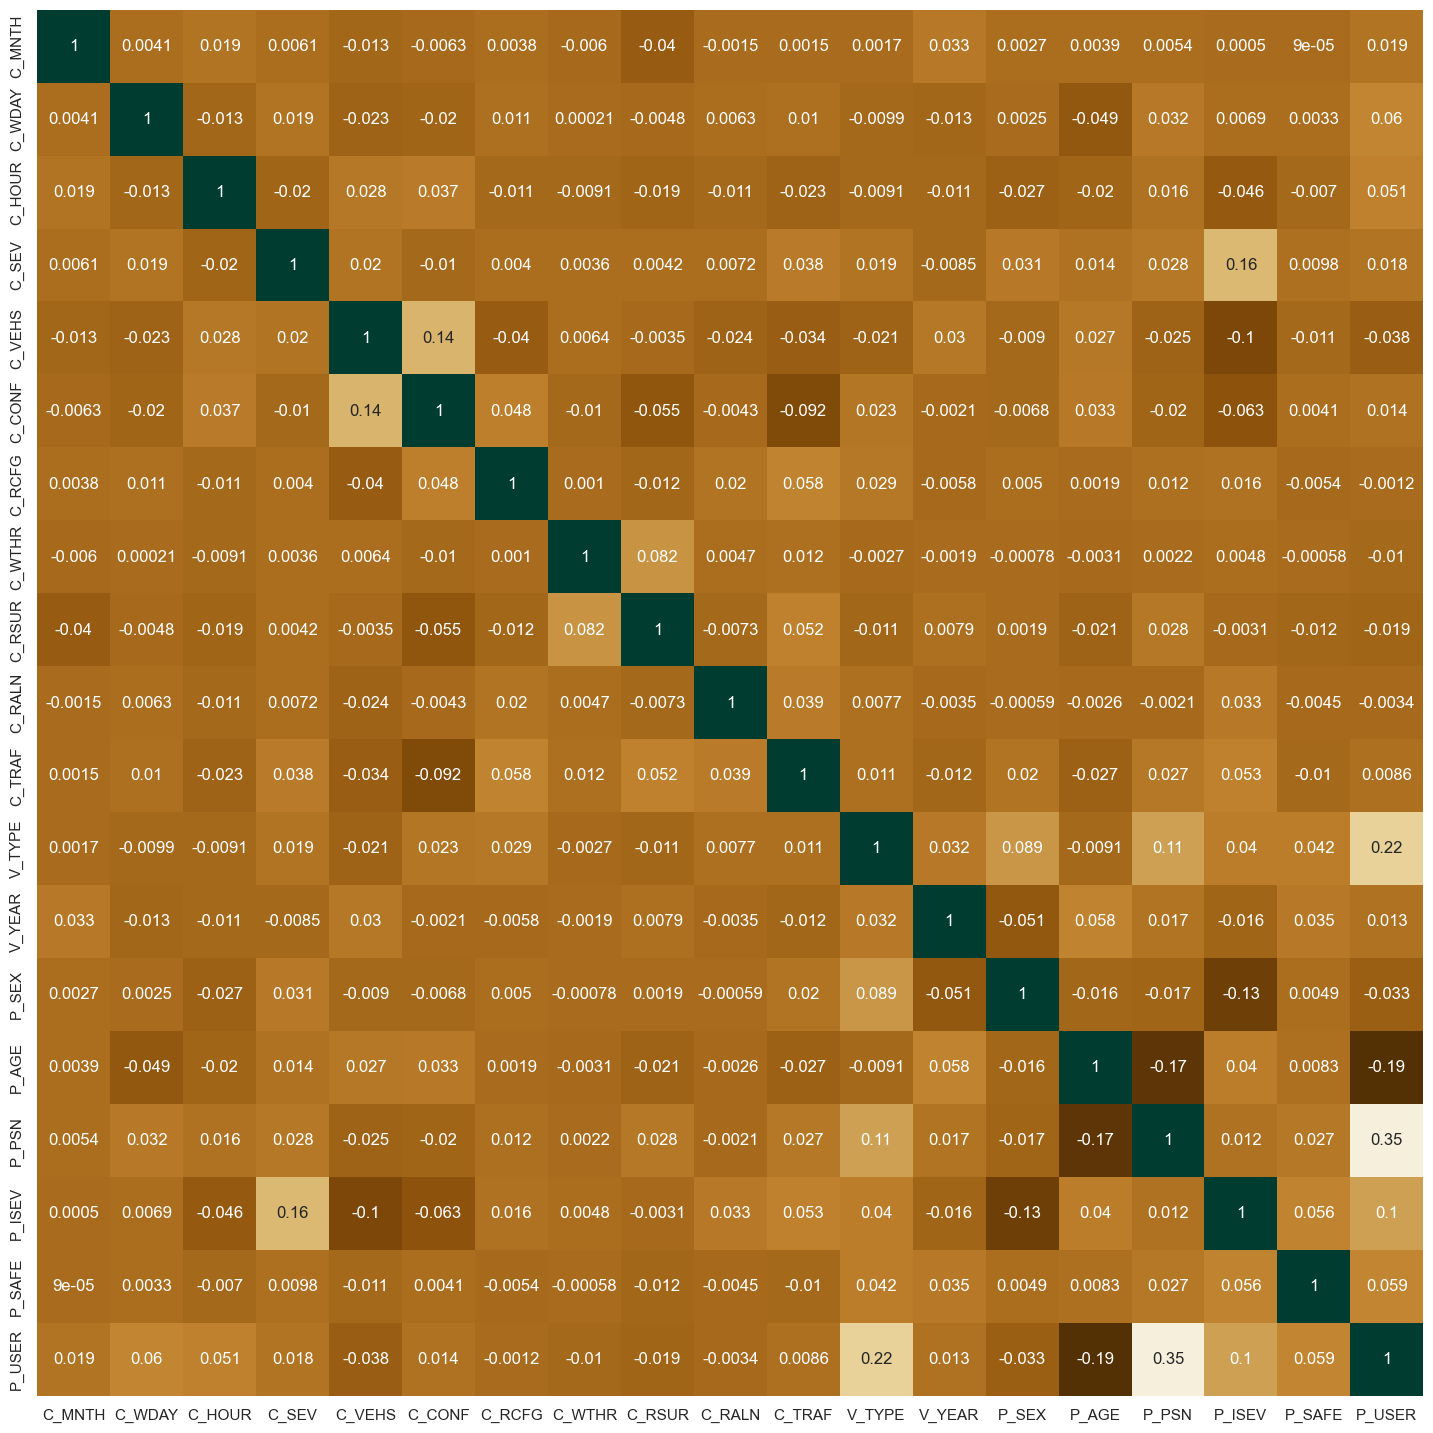

In [36]:
plt.figure(figsize=(18, 18))
corr = df_c.corr()
sns.heatmap(corr, cmap="BrBG", annot=True, square=True, cbar=False)
plt.show()

**En general** las correlaciones son mayoritariamente muy bajas en valor absoluto (la más alta en valor absoluto es 0,35). El signo de las mismas es bastante variado. 

Explicación de las correlaciones positivas más altas:


- **0.14 de correlación entre** las variables ***C_VEHS* y *C_CONF***:la primera nos da información sobre el número de vehículos involucrados en el accidente, *C_CONF* nos da información sobre la manera en la que se produce un accidente, esperaríamos que fuera más alta,  pero para cada número de vehículos involucrados hay diferentes opciones de configuración => se puede perder correlación.
   

- **0.16 de correlación entre *C_SEV*** y ***P_ISEV***: Esta segunda, nos indica el tratamiento médico requerido tras el accidente y puede indicar lesión/daño, ausencia de lesión/daño y fallecimiento en el acto => teniendo en cuenta que nuestra variable objetivo nos revela si las consecuencias finales del accidente son fallecimientos o no fallecimientos, es razonable que haya esa correlación.

- **0.22 de correlación entre *V_TYPE* y *P_USER***: La segunda da información sobre el tipo de usuario de la vía (conductor de vehículo de motor, pasajero de vehículo de motor, peatón, ciclista...). Lógicamente, esto tiene bastante que ver con el tipo de vehículo implicado en el accidente (que es lo que nos dice la primera)

- **0.35 de correlación entre *P_PSN* y *P_USER***: La primera de las variables nos da información sobre la posición ocupada por la persona en el vehículo en el momento del accidente. Teniendo en cuenta que *P_USER* da información sobre lo indicado en el párrafo previo, podemos darle fácil explicación a la que es la mayor correlación en valor absoluto.

Explicación de las correlaciones negativas más destacables:

- **-0.19 entre *P_USER* y *P_AGE***: 
    - **signo negativo** por la manera de codificar estas variables. 
    - **Correlación** No necesariamente, pero la mayoría de los conductores son mayores que pasajeros o peatones (véase niños o gente que aún no está en edad de conducir)
        - "peros": veánse personas muy mayores que no conduzcan 
- Una explicación similar se puede dar para el **-0.17 de correlación** que se da entre ***P_AGE* y *P_PSN***.

**Correlación con la variable objetivo:**

Todas las correlaciones que presenta *C_SEV* con el resto de variables son muy bajas. La más alta de ellas es la que ya hemos señalado con *P_ISEV*. 

Podría interesarnos que fuesen más altas,pero esto no tiene que significar necesariamente que nuestras características no tengan ninguna incidencia sobre la variable objetivo: 

**Las variables son categóricas, codificadas mediante números enteros, la manera en que se han codificado podría estar ditorsonando la verdadera correlación existente entre las diferentes variables.**

#### **2.3.2. Sobre alguna variable de interés**

Empezaremos hablando de la variable que será más importante para nosotros: nuestra **variable objetivo** ya hemos transformado su codificación => realizaremos un análisis descriptivo de su distribución y de su interacción con otras variables del dataframe.

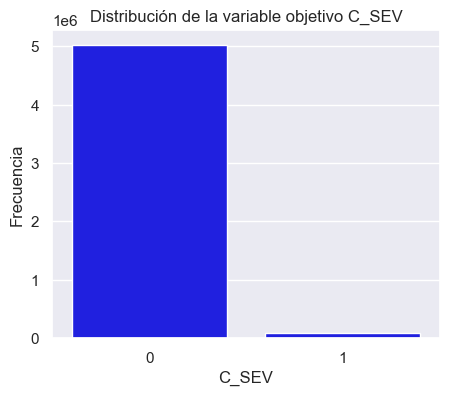

In [37]:
#En primer lugar, graficamos la distribución de la variable C_SEV:
plt.figure(figsize=(5, 4))
sns.countplot(x='C_SEV', data=df_c, color ='blue')

plt.xlabel('C_SEV')
plt.ylabel('Frecuencia')
plt.title('Distribución de la variable objetivo C_SEV')

plt.show()

**Problema claro:** la base de datos está muy desbalanceada en términos de nuestra variable objetivo => debemos tratarlo para que nuestros modelos de predicción no estén sesgados hacia la clase mayoritaria (lo hacemos más adelante).


In [38]:
df_c['C_SEV'].value_counts()

0    5030032
1      86343
Name: C_SEV, dtype: int64

**Variable** ***C_WTHR***: toma el valor 1 para indicar buen tiempo (claro y soleado), el valor '2', para nublado sin precipitación, el valor '3' para lluvioso, etc


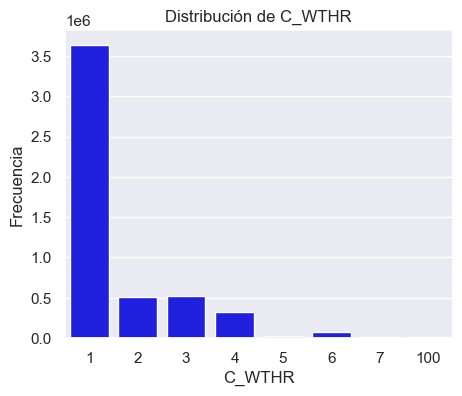

In [39]:
plt.figure(figsize=(5, 4))
sns.countplot(x='C_WTHR', data=df_c, color = 'blue')

plt.xlabel('C_WTHR')
plt.ylabel('Frecuencia')
plt.title('Distribución de C_WTHR')

plt.show()

La mayor de las frecuencias absolutas en esta variable ocurre para el valor '1': la mayoría de los accidentes registrados en este dataframe ocurren en días de buen tiempo. 

Juntando los valores '1' y '2', que denotan que no llovía en el momento del accidente, la diferencia que se da con los accidentes que ocurren con lluvía es aún más aplastante.

No contradice necesariamente la intuición de que con lluvia es más peligroso conducir: podría significar simplemente que los momentos de lluvia son muchísimos menos que los momentos de no-precipitación.


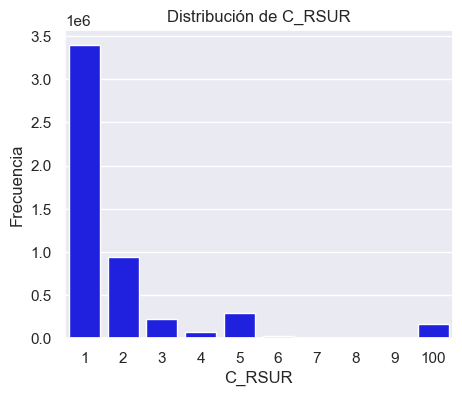

In [40]:
plt.figure(figsize=(5, 4))
sns.countplot(x='C_RSUR', data=df_c, color = 'blue')

plt.xlabel('C_RSUR')
plt.ylabel('Frecuencia')
plt.title('Distribución de C_RSUR')

plt.show()

**Variable** ***C_MNTH:*** las mayores frecuencias absolutas de accidentes de tráfico se dan en los meses en los que estamos acostumbrados a oír hablar de operaciones salida (como era predecible). Algo similar ocurre con la variable *C_WDAY* (la mayoría de accidentes ocurren viernes y sábados)

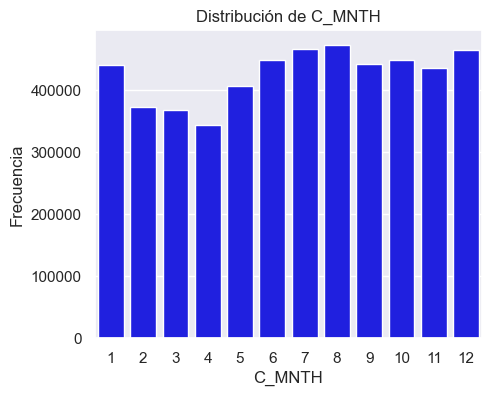

In [41]:
plt.figure(figsize=(5, 4))
sns.countplot(x='C_MNTH', data=df_c, color = 'blue')

plt.xlabel('C_MNTH')
plt.ylabel('Frecuencia')
plt.title('Distribución de C_MNTH')

plt.show()

**Variable** ***C_TRAF*** 
- Destaca el número 18 con diferencia, valor que toma la variable cuando no hay control de tráfico presente, es decir, la mayoría de accidentes se producen bajo estas circunstancias: **es importante regular bien el tráfico**.
- En segundo lugar encontramos el '1': el accidente se produce con todas las señales de tráfico opertivas
- El tercer valor más significativo es '3': el accidente ha sido a causa de un conflicto en un stop

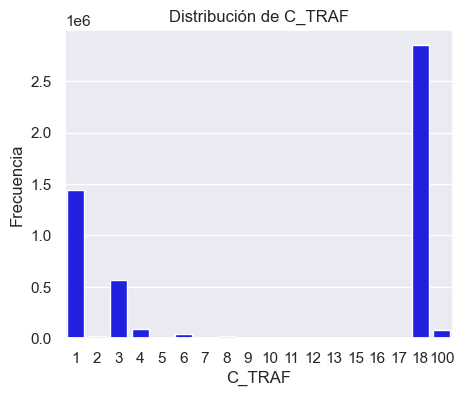

In [42]:
plt.figure(figsize=(5, 4))
sns.countplot(x='C_TRAF', data=df_c, color = 'blue')

plt.xlabel('C_TRAF')
plt.ylabel('Frecuencia')
plt.title('Distribución de C_TRAF')

plt.show()

Atendiendo a la información derivada de la siguiente variable, ***C_WDAY***, podemos hacer el mismo comentario que hacíamos con *C_MNTH*. La mayor cantidad de accidentes ocurren a lo largo de los viernes y los sábados.

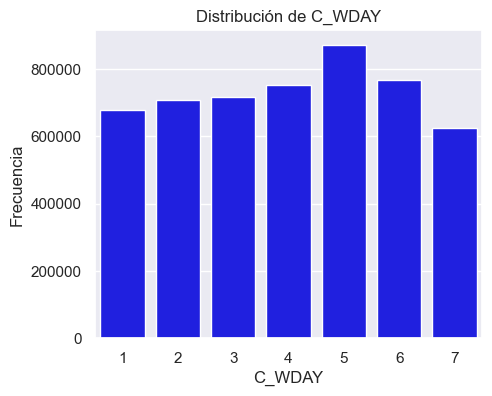

In [43]:
plt.figure(figsize=(5, 4))
sns.countplot(x='C_WDAY', data=df_c, color = 'blue')

plt.xlabel('C_WDAY')
plt.ylabel('Frecuencia')
plt.title('Distribución de C_WDAY')

plt.show()

### **2.4. Transformación de variables**

**Hasta ahora:** pequeñas modificaciones en la codificación sin alterar su significado, manteniendo las diferentes etiquetas.

**Ahora:** vemos si tiene sentido la diferenciación a través de etiquetas de algunas condiciones del accidente para alguna variable. Mirando la codificación podemos convenir alguna modificación:
- ***C_WTHR:*** toma el valor '1' en caso de día soleado y '2' en caso de estar nublado, pero sin precipitación. No es una distinción interesante por sí sola => etiqueta 1 cuando no haya precipitaciones o condiciones meteorológicas extraordinarias (esté soleado o nublado) 

In [44]:
df_c['C_WTHR'] = df_c['C_WTHR'].replace(2, 1)

- ***P_SAFE:*** identifica diferentes medidas de seguridad, aunque hay medidas ue no conviene mezclar (cinturón o casco con chaleco reflectante), las etiquetas '2' y '9' podrían ser agrupadas: 
    - La etiqueta '2': Safety device used or child restraint used.
    - La etiqueta '9': Helmet worn.

La única diferencia entre estas dos etiquetas reside en el tipo de vehículo, información se aporta a través de las variables *V_TYPE* y *P_USER*.

In [45]:
df_c['P_SAFE'] = df_c['P_SAFE'].replace(9, 2)

**Consecuencias de las transformaciones** 

- En los histogramas: evidente
- Correlaciones: ¿se mantiene la estructura?

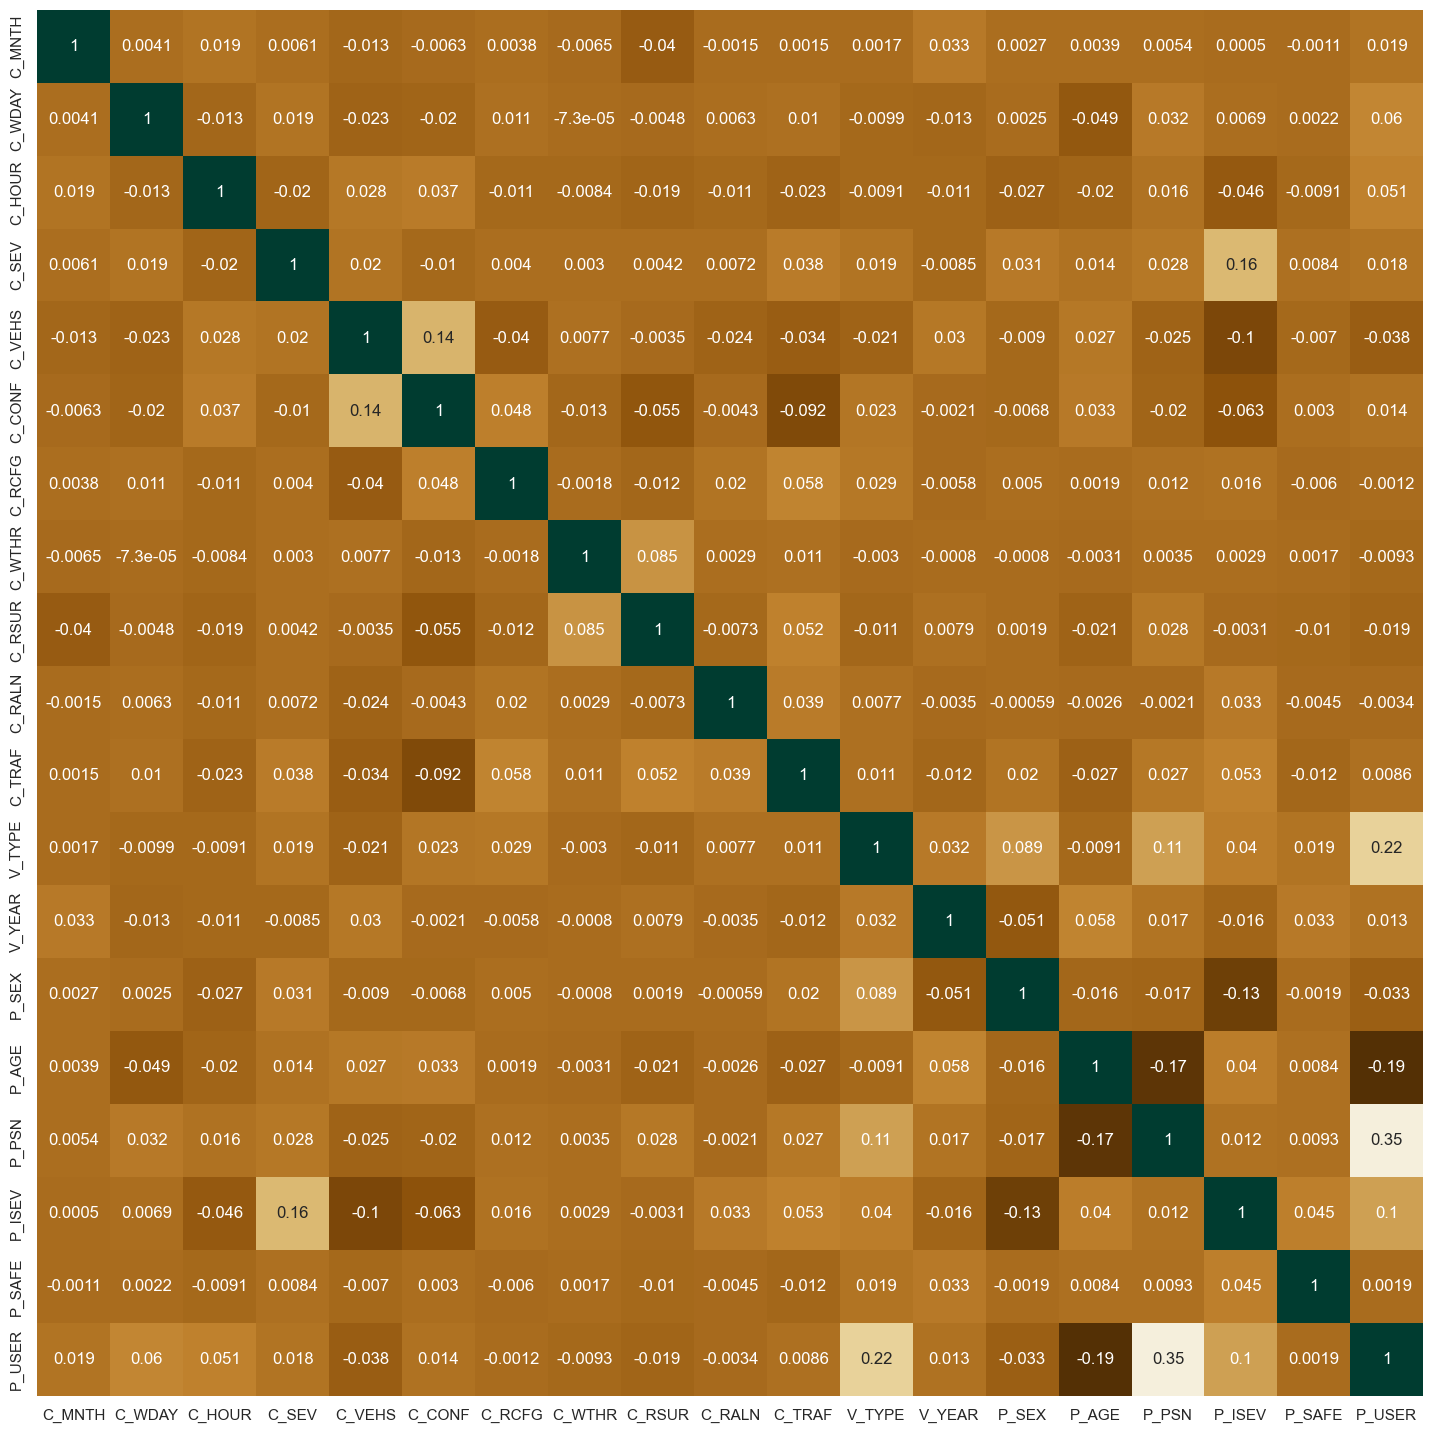

In [46]:
plt.figure(figsize=(18, 18))
corr = df_c.corr()
sns.heatmap(corr, cmap="BrBG", annot=True, square=True, cbar=False)
plt.show()

La diferencia es casi insignificante, se mantiene la estructura de correlaciones



**¿Tiene sentido/se podría crear alguna variable extra a partir de las existentes?**  

**Variables categóricas** => la creación de nuevas variables no es tan directa, como mucho: intersección de características, en caso de haberla: 
- La nueva variable no aporta mucha más **información** de la que ya tenemos
- Sí podríamos obtener mejoras en términos de **correlaciones**
    - Visto el tipo de correlaciones que tenemos tampoco mejorarían mucho
    - No merece la pena esforzarse en agrupar características enun anueva variable hasta dar con una combinación que aporte una verdadera mejora a la correlación.



### **2.5. Visualización y/o tratamiento de outliers**

**Variables categóricas** => no tiene mucho sentido hablar de observaciones **outliers en el sentido tradicional:** las etiquetas numéricas atienden a categorías y no a magnitudes continuas. 

**Valores inusuales en las variables categóricas:** podrían considerarse como observaciones atípicas en el contexto de la codificación esperada, estos valores podrían indicar **errores de codificación o datos incorrectos.**

En nuestro caso, no podemos revisar la correcta codificación, por lo que la damos por buena.

### **2.6. Selección de características**

**¿Cómo podemos tomar la decisión?** 
- **Correlaciones** de nuestra variable objetivo con el resto de variables: todas ellas son muy bajas => no es buen criterio para otorgar de manera robusta un orden de importancia a las variables.
- **Algoritmo Random Forest** 

In [47]:
# Seleccionamos las columnas de features y la variable objetivo
X = df_c.drop('C_SEV', axis=1)
y = df_c['C_SEV']

In [48]:
#Spliteamos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [49]:
#Escalamos
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [50]:
# Creamos el modelo de Random Forest
regressor = RandomForestRegressor(n_estimators=25, random_state=0)
regressor.fit(X_train_scaled, y_train)

RandomForestRegressor(n_estimators=25, random_state=0)

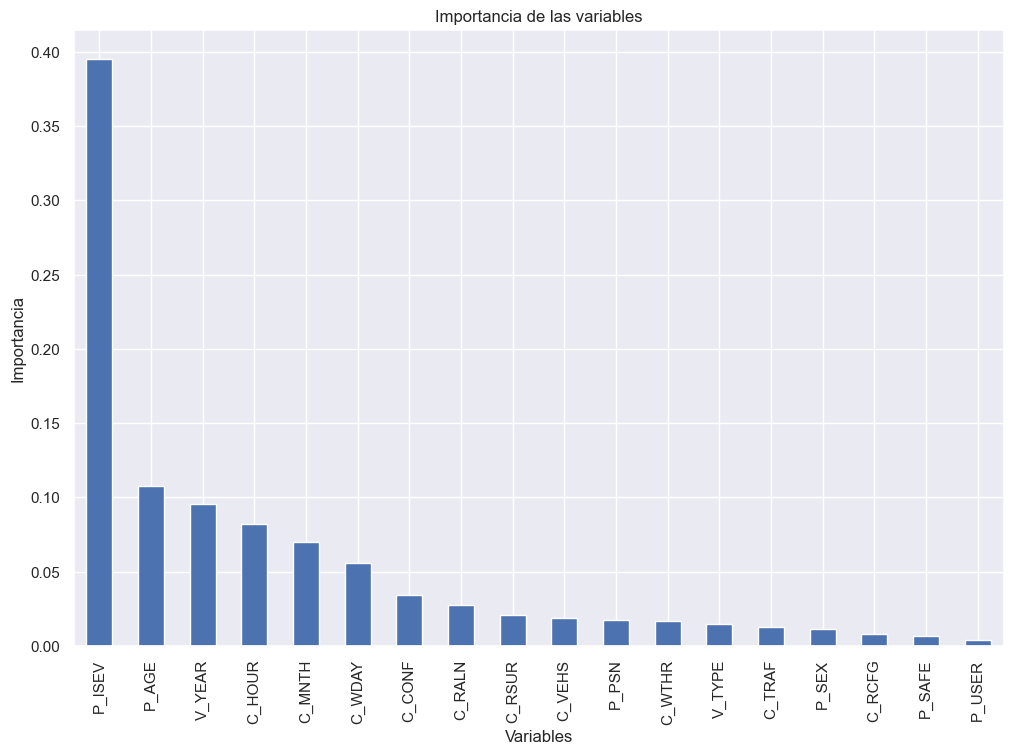

In [51]:
# Creamos una serie con la importancia de cada feature
importances = pd.Series(regressor.feature_importances_, index=X.columns)

# Ordenamos las importancias de forma descendente
importances_sorted = importances.sort_values(ascending=False)

# Hacemos el gráfico
plt.figure(figsize=(12,8))
importances_sorted.plot(kind='bar')
plt.title('Importancia de las variables')
plt.xlabel('Variables')
plt.ylabel('Importancia')
plt.show()

**Variable *P_ISEV*** parece ser la variable con más importancia. Su codificación:

| P_ISEV | Codificación |
| :- |:- |
| 1| No injury
| 2| Injury
| 3| Fatality

**OJO** la variable *P_ISEV* es prácticamente la misma variable que la objetivo, por eso parece ser tan importante. Sin embargo, precisamente por esto, consideramos que no tiene sentido incluirla entre las variables predictoras en nuestros modelos. Procedemos a eliminarla del dataset.

In [52]:
df_c = df_c.drop('P_ISEV', axis=1)

Nos quedan 17 variables predictoras.**¿Podemos descartar alguna más para reducir un poco este número?**
- **El criterio de importancia previo**, nos sugiere que las variables de *P_SEX* en adelante (orden del gráfico), no son importantes.
- Sin embargo, **atendiendo a las definiciones de las variables**, sí que consideramos que podrían llegar a ser importantes para intentar predecir nuestra variable objetivo. **¡¡¡¡NO HAY MÁS QUE VER *P_SAFE*!!!!**

Decidimos seguir trabajando con todas las variables restantes.

### **2.7. Balanceo de datos para *C_SEV***

Procedemos al balanceo de la variable por **undersampling**:

In [53]:
#Separamos las características de la variable objetivo
X = df_c.drop('C_SEV', axis=1)
y = df_c['C_SEV']

# Aplicar el undersampling
undersampler = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(X, y)

# Mostrar los datos balanceados
balanced_data = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.Series(y_resampled, name='C_SEV')], axis=1)
df_bal = pd.DataFrame(balanced_data, columns=X.columns.tolist() + ['C_SEV'])


In [54]:
df_bal

,C_MNTH,C_WDAY,C_HOUR,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,C_RALN,C_TRAF,V_TYPE,V_YEAR,P_SEX,P_AGE,P_PSN,P_SAFE,P_USER,C_SEV
0,4,5,16,3,21,2,5,5,1,8,1,1998,1,51,11,2,1,0
1,8,1,19,2,35,1,1,1,1,18,1,2005,0,40,11,2,1,0
2,3,5,7,2,21,1,3,2,1,18,1,2006,0,53,11,2,1,0
3,6,5,18,1,6,1,1,1,1,18,1,2000,1,9,21,2,2,0
4,9,4,9,1,3,100,3,2,3,18,1,2001,0,25,11,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172681,12,7,11,3,35,2,1,100,1,3,7,2014,0,35,11,2,1,1
172682,12,7,1,1,4,100,6,1,1,18,1,2011,0,30,11,2,1,1
172683,12,7,2,1,100,1,1,1,1,18,8,2013,1,37,11,2,1,1
172684,8,5,22,1,6,1,1,4,100,18,22,2000,1,67,12,1,1,1


In [55]:
#comprobamos que el dataframe está ahora balanceado:
df_bal['C_SEV'].value_counts()

0    86343
1    86343
Name: C_SEV, dtype: int64

Se puede comprobar en la salida anterior que, ahora sí, nuestra base de datos está balanceada correctamente. Podemos proceder al spliteo de nuestra muestra. Antes de ello, le cambiamos el nombre a nuestro dataframe.

In [56]:
df_fin = df_bal

In [57]:
df_fin.to_csv('preprocesado.csv', sep='\t')

**POR MOTIVOS DE MEMORIA SE GUARDA EL PREPROCESSING HASTA ESTE PUNTO Y SE CONTINUA CON EL SPLIT Y EL ENTRENAMIENTO DE MODELOS EN OTRO SCRIPT**